<a href="https://colab.research.google.com/github/tomeliud/Spotify-Prediction-whether-a-newly-uploaded-song-on-Spotify-will-make-to-be-a-hit-song-ML/blob/master/Spotify_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction 

Music is conisdered an art but have you ever thought of what happens probably behind the scenes to make it an art. May be it's the beats, energy, liveliness, and the ability to dance brought about by a tune. If all these factors work out right then a song is conisidered the most lively probably making it among the top hits. Using a spotify dataset we would like to know among which factors affect whether a song will be a hit song or not. Moreover, we will build a model that predicts whether a song will be a hit song based on the nature of it's beats, energy, danceablity, liveness, and loudness. 

Dataset 


> [[link]](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year?select=top10s.csv)



# Defining the question 

a. To find out which factors affect performance of a song on spotify 

b. To predict possibility of whether a song uploaded on spotify will be considered a hit song 

## 1. Metric of success 

Build a model that is able to determine if a song will hit on spotify with an accuracy of above 75%

## 2. Recording the Experimental Design

1.   Import Libraries
2.   Load the Dataset
3.   Data Cleaning
4.   EDA
5.   Modelling
6.   Evaluation of the Models

# Loading and previewing the dataset 

### Importing our libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') 

In [ ]:
spotify = pd.read_csv('datasets_456949_861300_top10s.csv', encoding='Latin1')

# Checking the data 

In [ ]:
spotify.head(5)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
spotify.tail(5)

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
598,599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69
602,603,Kills You Slowly,The Chainsmokers,electropop,2019,150,44,70,-9,13,23,213,6,6,67


In [ ]:
#size 
print(f'The dataset has {spotify.shape[0]} rows and {spotify.shape[1]} columns')

The dataset has 603 rows and 15 columns


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [ ]:
spotify.columns

Index(['Unnamed: 0', 'title', 'artist', 'top genre', 'year', 'bpm', 'nrgy',
       'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'],
      dtype='object')

# Tidying the dataset 

In [ ]:
#checking for null values 
spotify.isnull().sum()

Unnamed: 0    0
title         0
artist        0
top genre     0
year          0
bpm           0
nrgy          0
dnce          0
dB            0
live          0
val           0
dur           0
acous         0
spch          0
pop           0
dtype: int64

In [ ]:
#checking for duplicates 
spotify.duplicated().any()

False

In [ ]:
#droping unnecessary columns 
spotify.drop(['Unnamed: 0'],1, inplace=True)

In [ ]:
# renaming the columns for easier understanding
spotify = spotify.rename({'bpm':'beats_per_min',	'nrgy':'energy',	
                'dnce':'danceability',	'dB':'loudness',	
                'live':'liveness',	'val':'valence',	
                'dur':'duration'	,'acous':'acousticness'	,
                'spch':'speechiness'	,'pop':'popularity'}, axis=1)
spotify.head(2)

,title,artist,top genre,year,beats_per_min,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82


In [ ]:
spotify['popularity'].nunique()

71

In [ ]:
spotify['top genre'].nunique()

50

In [ ]:
#checking for unique values in the different columns
for columns in spotify.columns:
    print('/n')
    print(spotify[columns].unique())

/n
['Hey, Soul Sister' 'Love The Way You Lie' 'TiK ToK' 'Bad Romance'
 'Just the Way You Are' 'Baby' 'Dynamite' 'Secrets'
 'Empire State of Mind (Part II) Broken Down' 'Only Girl (In The World)'
 "Club Can't Handle Me (feat. David Guetta)" 'Marry You'
 'Cooler Than Me - Single Mix' 'Telephone' 'Like A G6'
 'OMG (feat. will.i.am)' 'Eenie Meenie' 'The Time (Dirty Bit)' 'Alejandro'
 'Your Love Is My Drug' 'Meet Me Halfway' 'Whataya Want from Me'
 'Take It Off' 'Misery' 'All The Right Moves' 'Animal' 'Naturally'
 'I Like It' 'Teenage Dream' 'California Gurls' '3'
 'My First Kiss - feat. Ke$ha' 'Blah Blah Blah (feat. 3OH!3)' 'Imma Be'
 'Try Sleeping with a Broken Heart' 'Sexy Bitch (feat. Akon)'
 'Bound To You - Burlesque Original Motion Picture Soundtrack'
 'If I Had You' 'Rock That Body' 'Dog Days Are Over'
 "Something's Got A Hold On Me - Burlesque Original Motion Picture Soundtrack"
 "Doesn't Mean Anything" 'Hard' 'Loca' 'You Lost Me' 'Not Myself Tonight'
 'Written in the Stars (feat. E

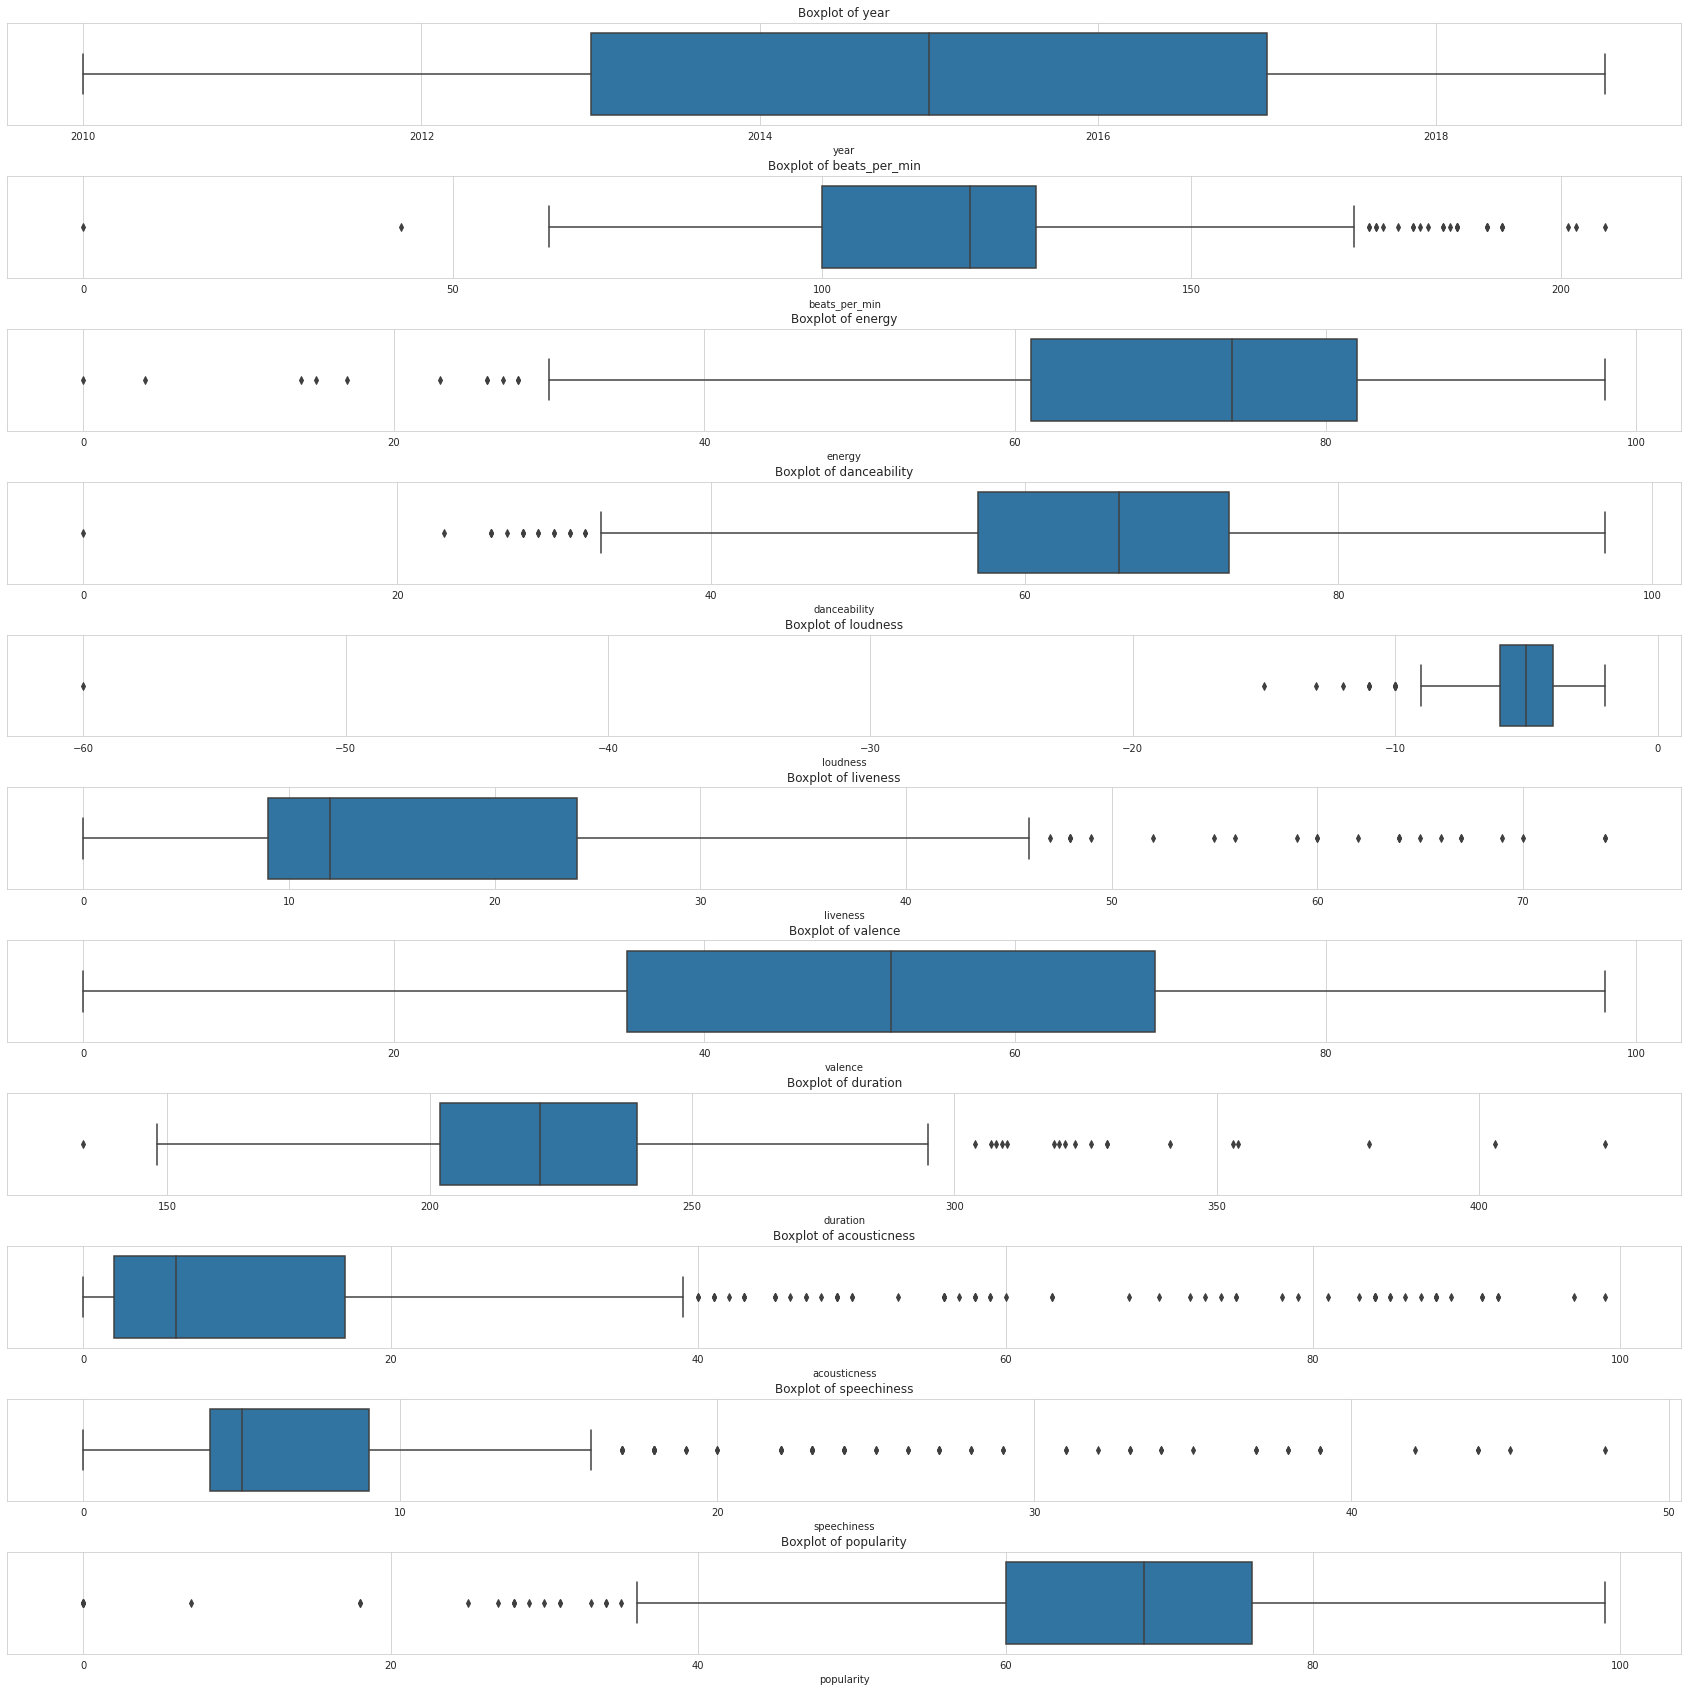

In [ ]:
# Checking for Outliers

num_col = ['year'	,'beats_per_min',	'energy',	'danceability',	'loudness',	'liveness',	'valence',	'duration'	,'acousticness'	,'speechiness'	,'popularity']

fig,ax = plt.subplots(len(num_col), figsize=(30,30))
sns.set_style('whitegrid')

for i, col in enumerate(num_col):
  sns.boxplot(spotify[col], ax=ax[i])
  ax[i].set_title("Boxplot of {}".format(col))

plt.subplots_adjust(hspace=0.5)

# Exploratory Data Anlysis 

## Univariate analysis 

In [ ]:
spotify.columns

Index(['title', 'artist', 'top genre', 'year', 'beats_per_min', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'duration',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

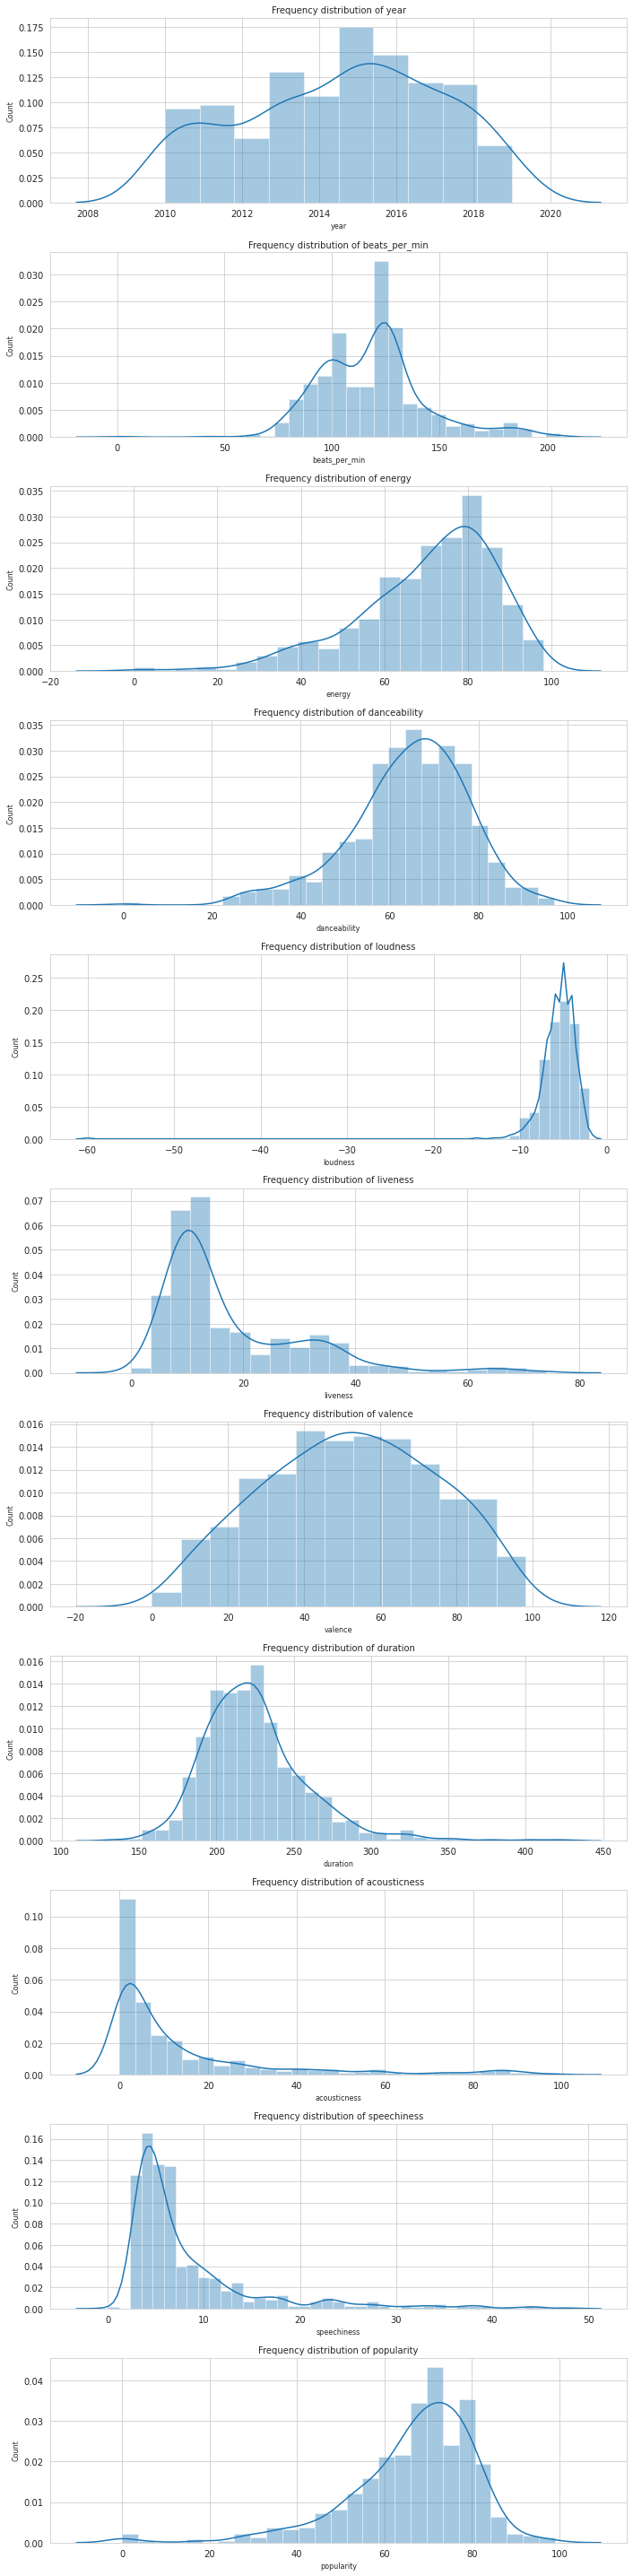

In [ ]:
#importing the warnings library
import warnings
warnings.filterwarnings('ignore')
# Plotting distribution of numerical variables
col_names = ['year', 'beats_per_min', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'duration',
       'acousticness', 'speechiness', 'popularity']
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(spotify[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show();

Text(0.5, 1.0, 'Bar graph of genre')

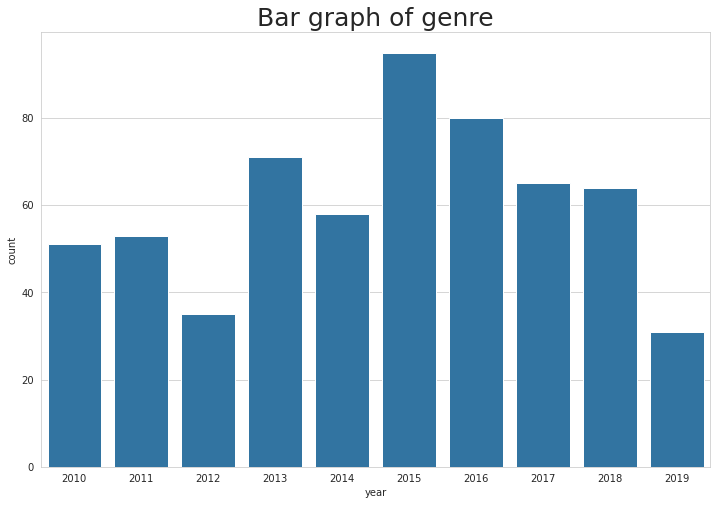

In [ ]:
# create the plot
base_color = sns.color_palette()[0]
fig, axes = plt.subplots(figsize=(12,8))
sns.countplot(data = spotify, x = 'year', color = base_color)

# add annotations
n_points = spotify.shape[0]
cat_counts = spotify['top genre'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels
plt.title('Bar graph of genre',fontsize=25)

Text(0.5, 1.0, 'Spotify Yearly data distribution')

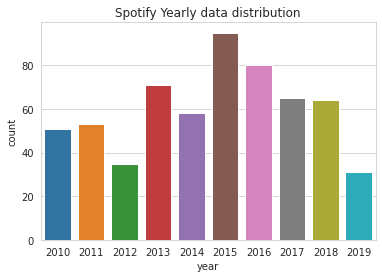

In [ ]:
sns.countplot(spotify['year'])
plt.title('Spotify Yearly data distribution')

## Bivariate analysis

<function matplotlib.pyplot.show>

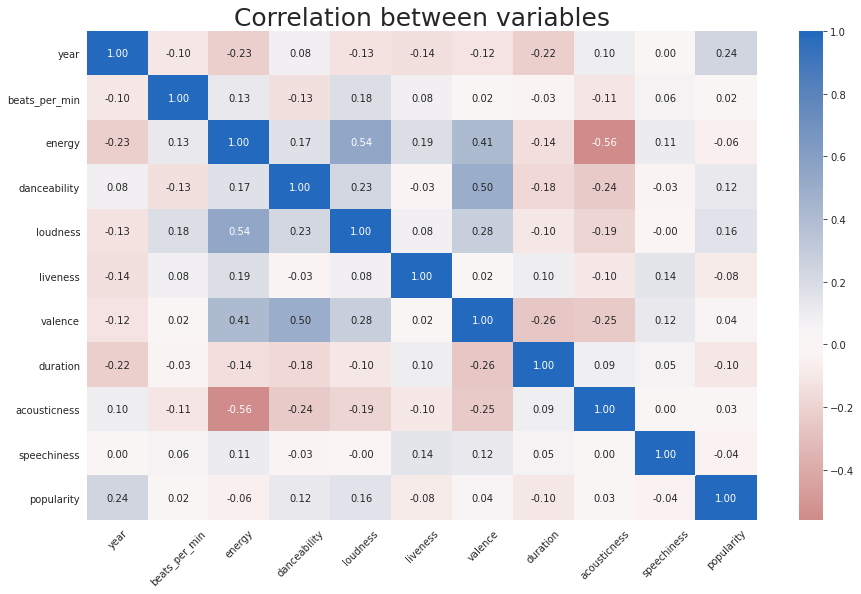

In [ ]:
plt.figure(figsize=(15,9))
sns.heatmap(spotify.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
#correlation_matrix=spotify.corr(method = 'spearman')
#sns.heatmap(correlation_matrix, xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns, annot = True)
plt.xticks( rotation=45)
plt.title('Correlation between variables',fontsize=25)
plt.show

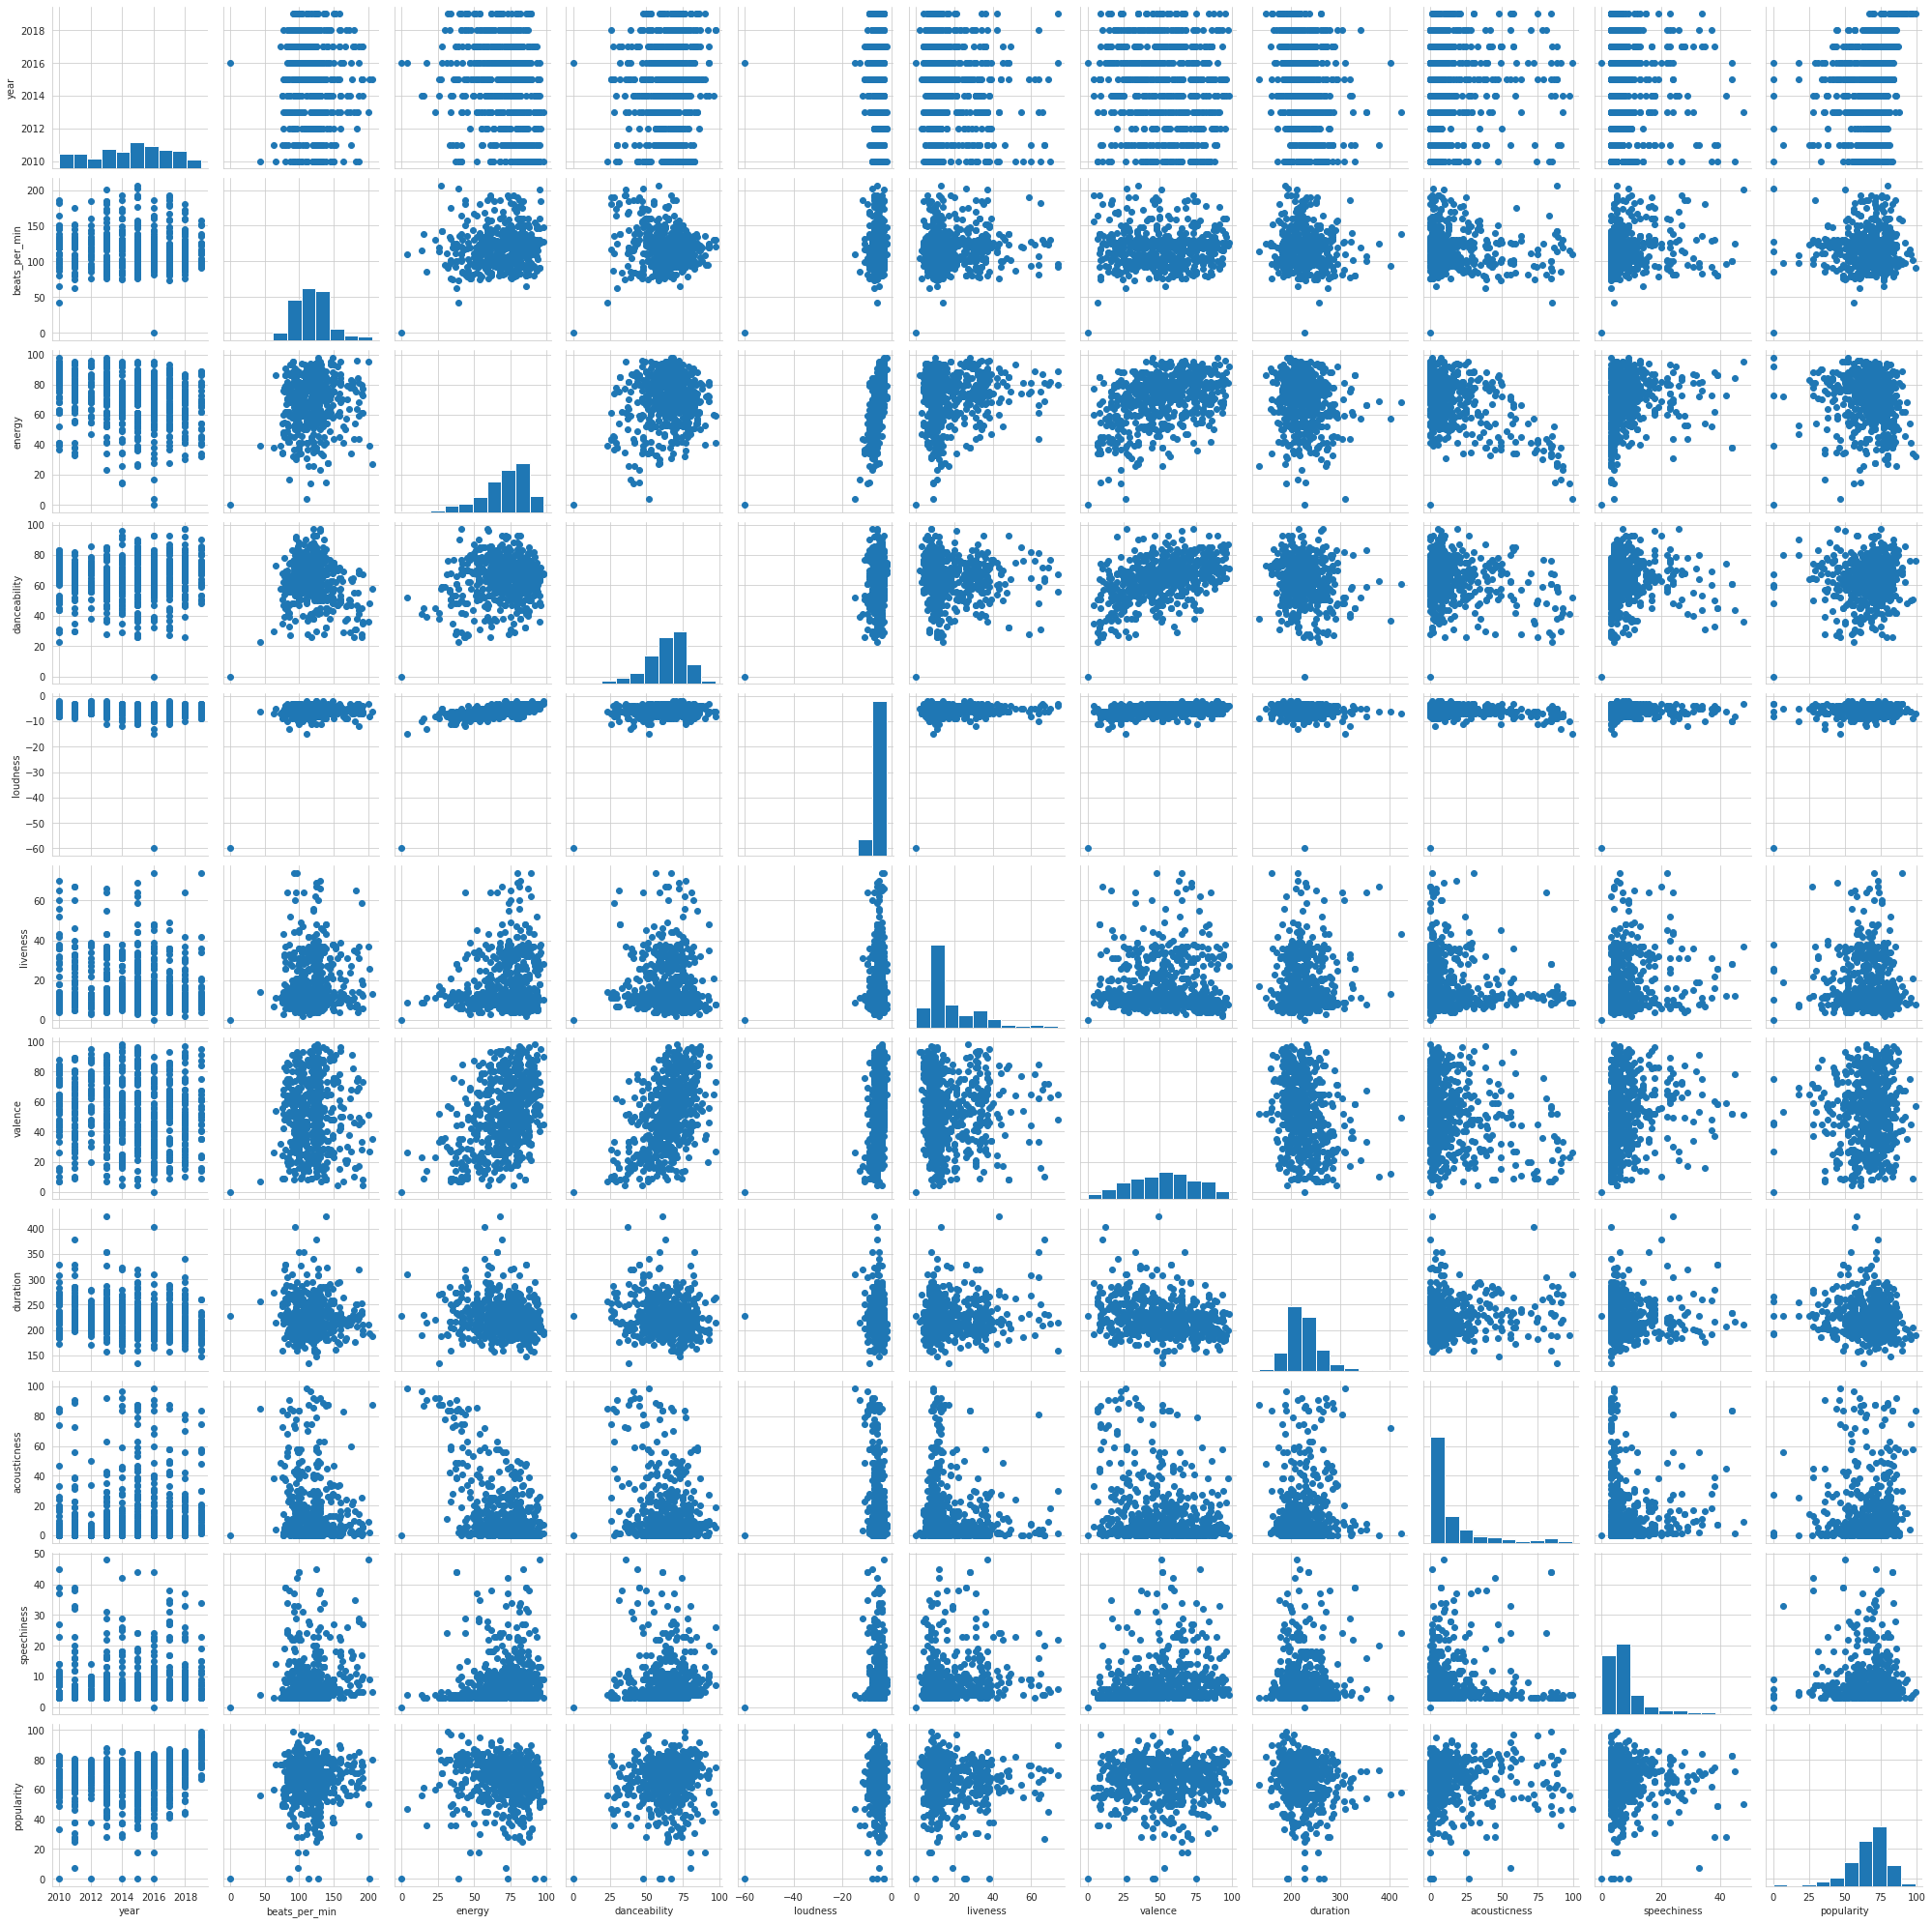

In [ ]:
#pairgrid to visualize the correlation between numerical variables
g = sns.PairGrid(data = spotify, vars = ['year', 'beats_per_min', 'energy','danceability', 'loudness', 'liveness', 'valence', 'duration','acousticness', 'speechiness', 'popularity'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

From the above visulaization we can prove that our data runs from 2010 to 2019 with 2015 recording the heighest number of records. 

In [ ]:
#Description of the numeric data

des = spotify.describe()
des.loc['Range'] = des.loc['max'] - des.loc['min']
des.loc['IQR'] = des.loc['75%'] - des.loc['25%'] 
# appending interquartile range instead of recalculating it
des = des.append(spotify.reindex(des.columns, axis=1).agg(['skew', 'kurt']))
des

,year,beats_per_min,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
count,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000,603.000
mean,2014.592,118.546,70.504,64.380,-5.579,17.774,52.226,224.675,14.327,8.358,66.521
std,2.607,24.795,16.311,13.379,2.798,13.103,22.513,34.130,20.766,7.483,14.518
min,2010.000,0.000,0.000,0.000,-60.000,0.000,0.000,134.000,0.000,0.000,0.000
25%,2013.000,100.000,61.000,57.000,-6.000,9.000,35.000,202.000,2.000,4.000,60.000
50%,2015.000,120.000,74.000,66.000,-5.000,12.000,52.000,221.000,6.000,5.000,69.000
75%,2017.000,129.000,82.000,73.000,-4.000,24.000,69.000,239.500,17.000,9.000,76.000
max,2019.000,206.000,98.000,97.000,-2.000,74.000,98.000,424.000,99.000,48.000,99.000
Range,9.000,206.000,98.000,97.000,58.000,74.000,98.000,290.000,99.000,48.000,99.000
IQR,4.000,29.000,21.000,16.000,2.000,15.000,34.000,37.500,15.000,5.000,16.000


In [ ]:
spotify.nunique()

title            584
artist           184
top genre         50
year              10
beats_per_min    104
energy            77
danceability      70
loudness          14
liveness          61
valence           94
duration         144
acousticness      75
speechiness       39
popularity        71
dtype: int64

## Multivariate Analysis

Text(34.30681966145834, 0.5, 'popularity')

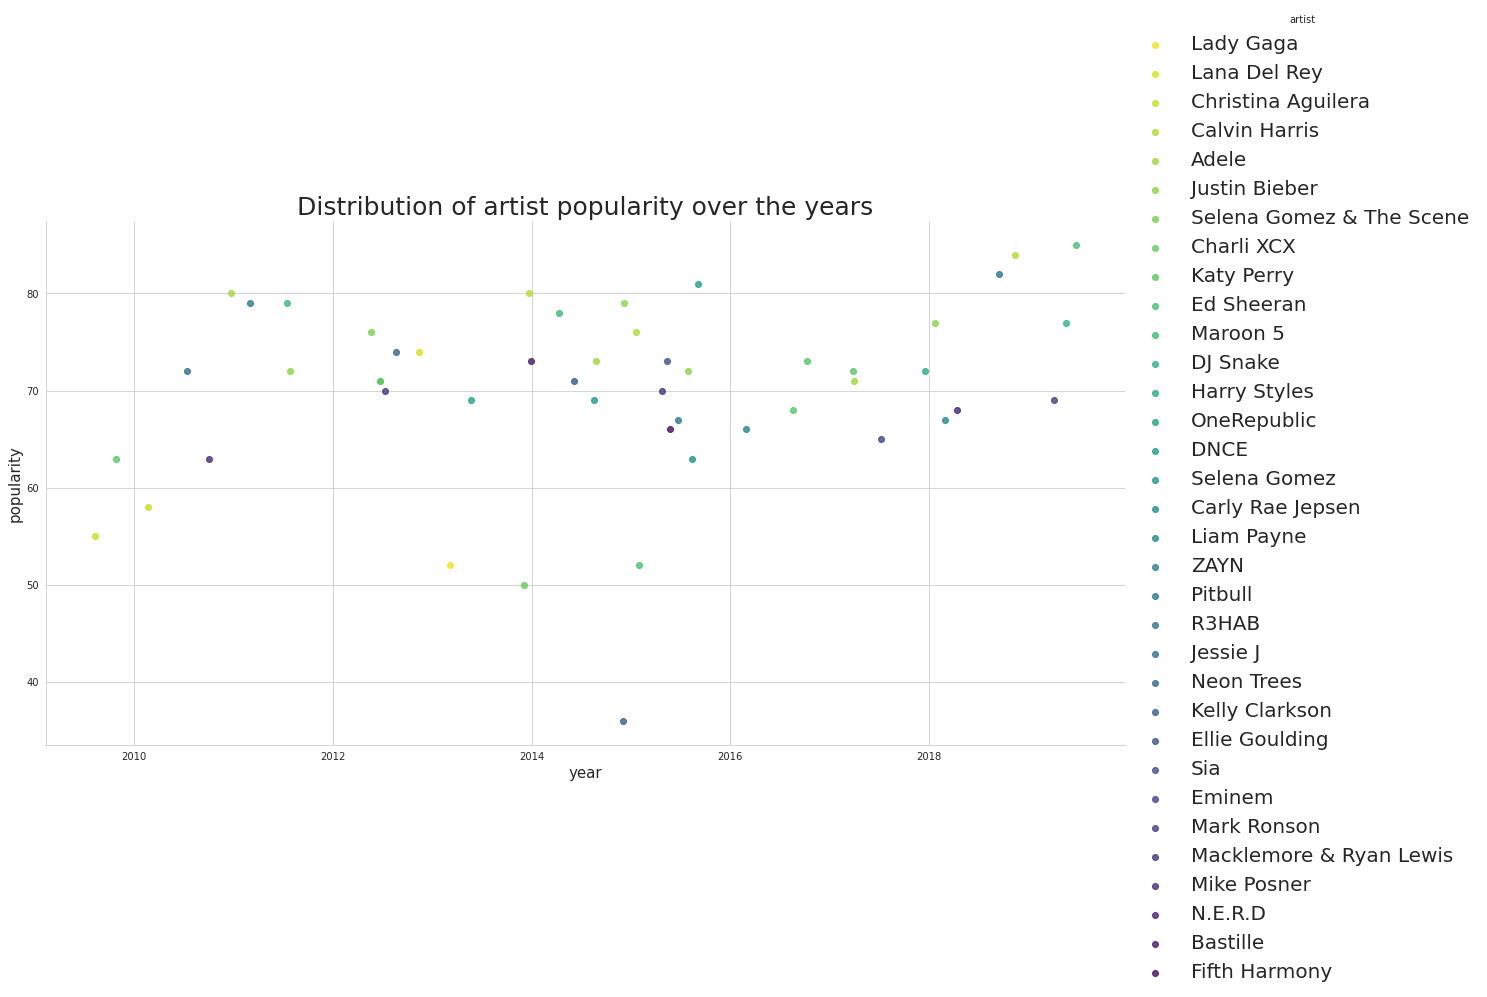

In [ ]:
np.random.seed(5)
sample=np.random.choice(spotify.shape[0],50,replace=False)
spotify_subset=spotify.loc[sample]
g=sns.FacetGrid(data=spotify_subset,hue='artist',size=8,aspect=2,palette='viridis_r')
g=g.map(sns.regplot,'year','popularity',x_jitter=0.5,fit_reg=False);
g.add_legend(fontsize= 20)
plt.title('Distribution of artist popularity over the years', fontsize= 25)
plt.xlabel('year', fontsize = 15)
plt.ylabel('popularity',fontsize =15)

create a copy of the spotify dataset

In [ ]:
data=spotify.copy()
data.columns

Index(['title', 'artist', 'top genre', 'year', 'beats_per_min', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'duration',
       'acousticness', 'speechiness', 'popularity'],
      dtype='object')

## Label Encoding

In [ ]:
#droping unnecessary columns 
spotify.drop(['Unnamed: 0'],1, inplace=True)
# Importing label encoder
# 
from sklearn.preprocessing import LabelEncoder
# Categorical boolean mask
categorical_feature_mask = data.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = data.columns[categorical_feature_mask].tolist()
categorical_features

['title', 'artist', 'top genre']

In [ ]:
#initializing the label encoder
le = LabelEncoder()
# Converting the variables to numerical
for i in range(3):
    new = le.fit_transform(data[categorical_features[i]])
    data[categorical_features[i]] = new
data.head()

,title,artist,top genre,year,beats_per_min,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,202,174,46,2010,97,89,67,-4,8,80,217,19,4,83
1,298,49,27,2010,87,93,75,-5,52,64,263,24,23,82
2,502,89,25,2010,120,84,76,-3,29,71,200,10,14,80
3,41,94,25,2010,119,92,70,-4,8,71,295,0,4,79
4,252,19,48,2010,109,84,64,-5,9,43,221,2,4,78


## Detecting multicollinearity

In [ ]:
# correlations between the variables
correlations = data.corr()
correlations

,title,artist,top genre,year,beats_per_min,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
title,1.000,-0.023,-0.042,-0.015,-0.024,-0.048,0.015,-0.044,-0.009,0.027,-0.012,0.043,-0.006,0.084
artist,-0.023,1.000,-0.129,0.013,-0.011,0.059,0.064,0.058,-0.002,0.029,-0.054,-0.048,0.014,0.052
top genre,-0.042,-0.129,1.000,0.101,-0.067,-0.056,0.103,-0.012,0.033,0.032,-0.039,0.052,-0.076,0.128
year,-0.015,0.013,0.101,1.000,-0.104,-0.226,0.079,-0.126,-0.136,-0.122,-0.215,0.102,0.005,0.241
beats_per_min,-0.024,-0.011,-0.067,-0.104,1.000,0.126,-0.131,0.184,0.082,0.016,-0.029,-0.113,0.059,0.019
energy,-0.048,0.059,-0.056,-0.226,0.126,1.000,0.167,0.538,0.187,0.410,-0.144,-0.562,0.107,-0.058
danceability,0.015,0.064,0.103,0.079,-0.131,0.167,1.000,0.233,-0.029,0.502,-0.177,-0.240,-0.028,0.116
loudness,-0.044,0.058,-0.012,-0.126,0.184,0.538,0.233,1.000,0.082,0.283,-0.105,-0.190,-0.001,0.157
liveness,-0.009,-0.002,0.033,-0.136,0.082,0.187,-0.029,0.082,1.000,0.020,0.098,-0.098,0.144,-0.076
valence,0.027,0.029,0.032,-0.122,0.016,0.410,0.502,0.283,0.020,1.000,-0.262,-0.249,0.122,0.039


 **VIF score to detect multicollinearity for the dataset**

In [ ]:
#dataframe with the inverse of the correlations matrix for housing data
#use these correlations to compute the VIF score for each variable
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,title,artist,top genre,year,beats_per_min,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
title,1.021,0.034,0.067,0.052,0.017,0.023,-0.016,0.065,-0.012,-0.046,0.017,-0.038,0.009,-0.112
artist,0.034,1.033,0.149,-0.003,0.025,-0.040,-0.069,-0.018,-0.005,0.037,0.046,0.007,-0.011,-0.065
top genre,0.067,0.149,1.073,-0.064,0.044,0.008,-0.105,0.034,-0.083,-0.026,0.014,-0.066,0.083,-0.127
year,0.052,-0.003,-0.064,1.250,0.077,0.187,-0.169,0.084,0.082,0.241,0.309,0.010,-0.109,-0.258
beats_per_min,0.017,0.025,0.044,0.077,1.106,0.106,0.244,-0.249,-0.057,-0.038,0.065,0.167,-0.060,-0.034
energy,0.023,-0.040,0.008,0.187,0.106,2.446,0.356,-1.030,-0.205,-0.541,0.157,1.080,-0.167,0.199
danceability,-0.016,-0.069,-0.105,-0.169,0.244,0.356,1.559,-0.326,0.003,-0.767,0.013,0.369,0.075,-0.030
loudness,0.065,-0.018,0.034,0.084,-0.249,-1.030,-0.326,1.655,0.006,0.032,-0.015,-0.367,0.106,-0.294
liveness,-0.012,-0.005,-0.083,0.082,-0.057,-0.205,0.003,0.006,1.088,0.065,-0.094,0.007,-0.139,0.044
valence,-0.046,0.037,-0.026,0.241,-0.038,-0.541,-0.767,0.032,0.065,1.706,0.299,-0.101,-0.200,-0.035


**There is no multicolinearity because as shown above all values are below 2.**

# Residual plots and heteroskedasticity testing:using Linear regression

In [ ]:
data=data[['title', 'artist', 'top genre', 'year', 'beats_per_min', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'duration',
       'acousticness', 'speechiness', 'popularity']]
data.head(5)

,title,artist,top genre,year,beats_per_min,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,202,174,46,2010,97,89,67,-4,8,80,217,19,4,83
1,298,49,27,2010,87,93,75,-5,52,64,263,24,23,82
2,502,89,25,2010,120,84,76,-3,29,71,200,10,14,80
3,41,94,25,2010,119,92,70,-4,8,71,295,0,4,79
4,252,19,48,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data.drop(['popularity'],axis=1)
y = data['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,popularity
count,121.000
mean,2.028
std,16.218
min,-26.903
25%,-9.579
50%,-0.529
75%,7.681
max,60.084


##  Residual plot

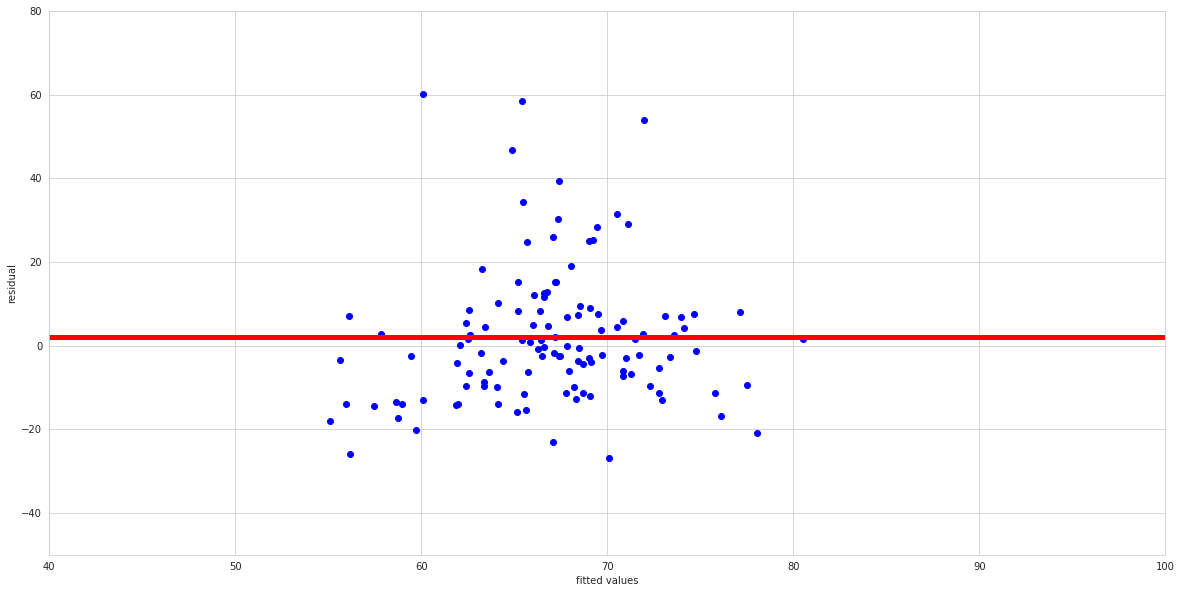

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20, 10))
plt.scatter(y_predict, residuals, color='blue')
plt.ylim(-50, 80)
plt.xlim(40, 100)
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=5)
plt.show()

Funnel shaped indicating no multicolinearity

## Heteroskedasticity test(bartlett's test).

-Null Hypothsis: The variance is equal for all our datapoints

-Alternative Hypothesis: The variance is different for at least one pair of datapoints.

In [ ]:
#importing the library
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#  compute a critical value of the chi squared distribution which helps to interpret the results 
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then the null hypothesis rejected. 
#This would mean that there are patterns to the variance of the data

# the null hypothesis that the variance is homogeneous across the data is accepted

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

2.1568844775518582e-31
The variances are homogeneous!


# Dealing with categorical values

In [ ]:
spotify.head()

,title,artist,top genre,year,beats_per_min,energy,danceability,loudness,liveness,valence,duration,acousticness,speechiness,popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [ ]:
# Selecting the Variables and Labels
Y = y
print(spotify.shape)
print(Y.shape)

(603, 14)
(603,)


In [ ]:
#Label encoding  

# Categorical boolean mask
categorical_feature_mask = spotify.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_features = spotify.columns[categorical_feature_mask].tolist()
categorical_features

['title', 'artist', 'top genre']

In [ ]:
#getting the length of categorical_features
len(categorical_features)

3

In [ ]:
#Getting numerical dummies for the categorical data
columns =['title', 'artist', 'top genre']
col = spotify[columns]
spotify = pd.get_dummies(col,drop_first=True)

#checking if the transformation was successful
spotify

,title_#SELFIE,title_#thatPOWER,title_...Ready For It? - BloodPop® Remix,title_1+1,title_24K Magic,title_2U (feat. Justin Bieber),title_3,title_43776,title_7 Years,title_A L I E N S,title_A Little Party Never Killed Nobody (All We Got),title_A Sky Full of Stars,title_A Thousand Years,title_Adore You,title_Ain't Your Mama,title_Alejandro,title_Alive,title_All About That Bass,title_All Around The World (La La La),title_All I Ask,title_All The Right Moves,title_All We Know,title_All of Me,title_American Oxygen,title_Anaconda,title_Angel,title_Animal,title_Animals,title_Antisocial (with Travis Scott),title_Anything Could Happen,title_Anywhere,title_Applause,title_Atlas - From The Hunger Games: Catching Fire Soundtrack,title_Attention,title_BO$$,title_BURNITUP!,title_Baby,title_Baby Don't Lie,title_Bad At Love,title_Bad Liar,...,top genre_belgian edm,top genre_big room,top genre_boy band,top genre_british soul,top genre_brostep,top genre_canadian contemporary r&b,top genre_canadian hip hop,top genre_canadian latin,top genre_canadian pop,top genre_candy pop,top genre_celtic rock,top genre_chicago rap,top genre_colombian pop,top genre_complextro,top genre_contemporary country,top genre_dance pop,top genre_danish pop,top genre_detroit hip hop,top genre_downtempo,top genre_edm,top genre_electro,top genre_electro house,top genre_electronic trap,top genre_electropop,top genre_escape room,top genre_folk-pop,top genre_french indie pop,top genre_hip hop,top genre_hip pop,top genre_hollywood,top genre_house,top genre_indie pop,top genre_irish singer-songwriter,top genre_latin,top genre_metropopolis,top genre_moroccan pop,top genre_neo mellow,top genre_permanent wave,top genre_pop,top genre_tropical house
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
599,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
601,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Modelling

# performing PCA for feature reduction and independence

In [ ]:
# Standardize the dataset using StandardScaler function in scikit-learn

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [ ]:
# split the data into train and test set.
from sklearn.model_selection import train_test_split

seed      = 9
test_size = 0.25

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(452, 13)
(151, 13)
(452,)
(151,)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points
#PCA with 5 principal components
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
X_train  = pd.DataFrame(data = X_train
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])
X_test = pd.DataFrame(data = X_test
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])

In [ ]:
X_train 

,PrincComp_1,PrincComp_2,PrincComp_3,PrincComp_4,PrincComp_5
0,0.087,0.250,0.133,0.331,-0.256
1,0.301,0.013,0.553,-0.004,-0.502
2,0.008,0.270,-0.163,0.055,-0.170
3,-0.050,-0.734,-0.303,0.056,0.176
4,-0.666,0.315,-0.157,0.397,-0.325
...,...,...,...,...,...
447,-0.306,0.061,-0.268,0.036,-0.304
448,-0.259,-0.532,-0.338,-0.192,-0.119
449,-0.007,0.420,0.365,0.106,0.098
450,-0.055,0.185,-0.205,-0.155,-0.070


In [ ]:
X_test

,PrincComp_1,PrincComp_2,PrincComp_3,PrincComp_4,PrincComp_5
0,0.055,0.101,0.454,0.333,0.435
1,-0.339,0.321,-0.043,-0.173,0.112
2,0.048,0.551,0.184,0.038,0.308
3,-0.481,-0.361,0.339,0.328,-0.116
4,-0.429,-0.159,0.086,0.156,0.117
...,...,...,...,...,...
146,0.046,0.068,-0.403,-0.452,0.311
147,-0.179,0.048,0.298,0.124,-0.200
148,0.199,0.079,0.451,0.122,-0.235
149,0.326,-0.041,-0.629,0.930,0.114


## Regression Model Implementation

In [ ]:
# use different regression models offered by scikit-learn to produce a baseline accuracy for this problem.
#use the MSE (Mean Squared Error) as the performance metric for the regression models.

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
# Import an Multi-Layer Perceptron Regressor model estimator from Scikit-Learn's neural_network library
from sklearn.neural_network import MLPRegressor
# user variables to tune
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()
models["ridge"] = Ridge(normalize=True)

Linear: -177.43, 55.662
Lasso: -188.189, 66.169
ElasticNet: -187.898, 66.117
KNN: -198.052, 52.683
DecisionTree: -343.424, 104.688
SVR: -180.857, 65.473
AdaBoost: -198.326, 36.621
GradientBoost: -183.763, 44.257
RandomForest: -184.317, 45.418
ExtraTrees: -181.541, 43.281
ridge: -179.021, 60.791


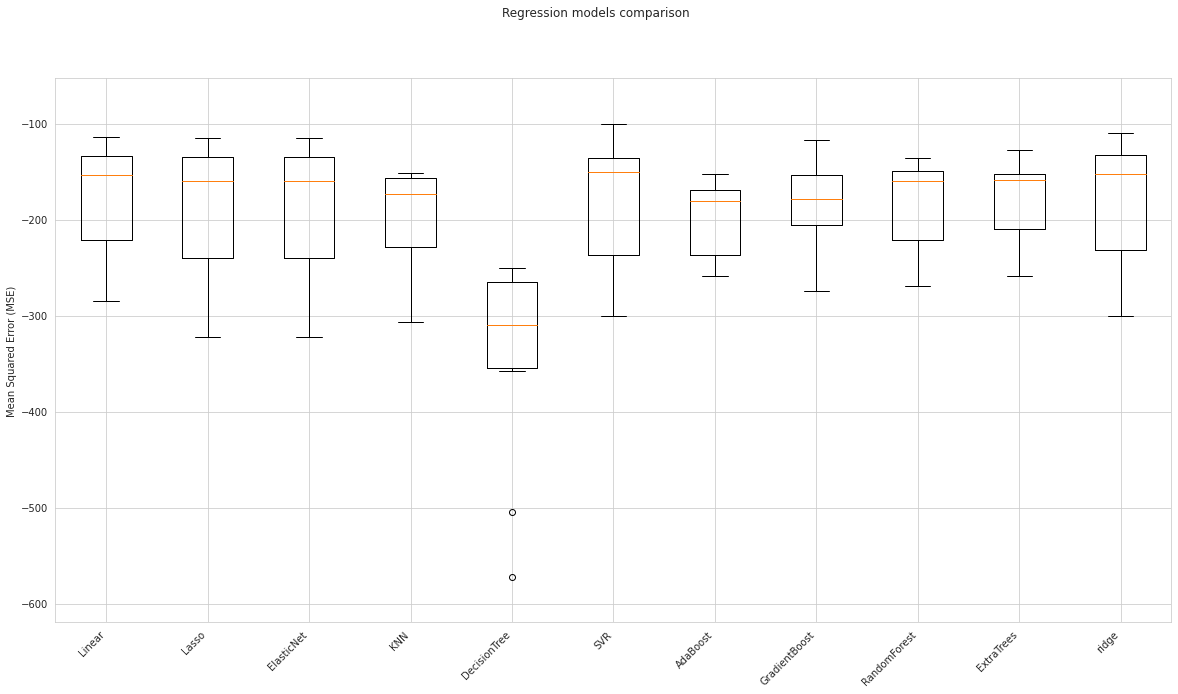

<Figure size 432x288 with 0 Axes>

In [ ]:
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure(figsize=(20, 10))
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.show()
plt.clf()


Linear: -179.6, 57.815

Lasso: -187.956, 66.255

ElasticNet: -186.702, 65.735

KNN: -207.955, 55.189

DecisionTree: -344.314, 63.044

SVR: -183.529, 67.892

AdaBoost: -203.186, 40.331

GradientBoost: -170.454, 50.622

RandomForest: -175.878, 43.962

ExtraTrees: -171.151, 46.207

In [ ]:
# create and fit the best regression model
best_model = Ridge(random_state=seed)
best_model=Ridge(alpha=1.0, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=seed)
#best_model = LinearRegression()#( fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=seed)
#best_model = KNeighborsRegressor()
best_model.fit(X_train, y_train[0:452])
# make predictions using the model
predictions = best_model.predict(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}
#parameters = ( normalize=False)
from sklearn.linear_model import Ridge
# ridge regression model 
ridge = Ridge(normalize=True)
#linear = LinearRegression(normalize=False)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [ ]:
#use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X_train,Y_train[0:452])
search.best_params_
{'alpha': 0.01}
abs(search.best_score_)

177.14002056819544

In [ ]:
#test performance 
search.fit(X_test[0:121],Y_test[0:121])
search.best_params_
{'alpha': 0.01}
abs(search.best_score_)

290.13702319935123

## Visualize the best model

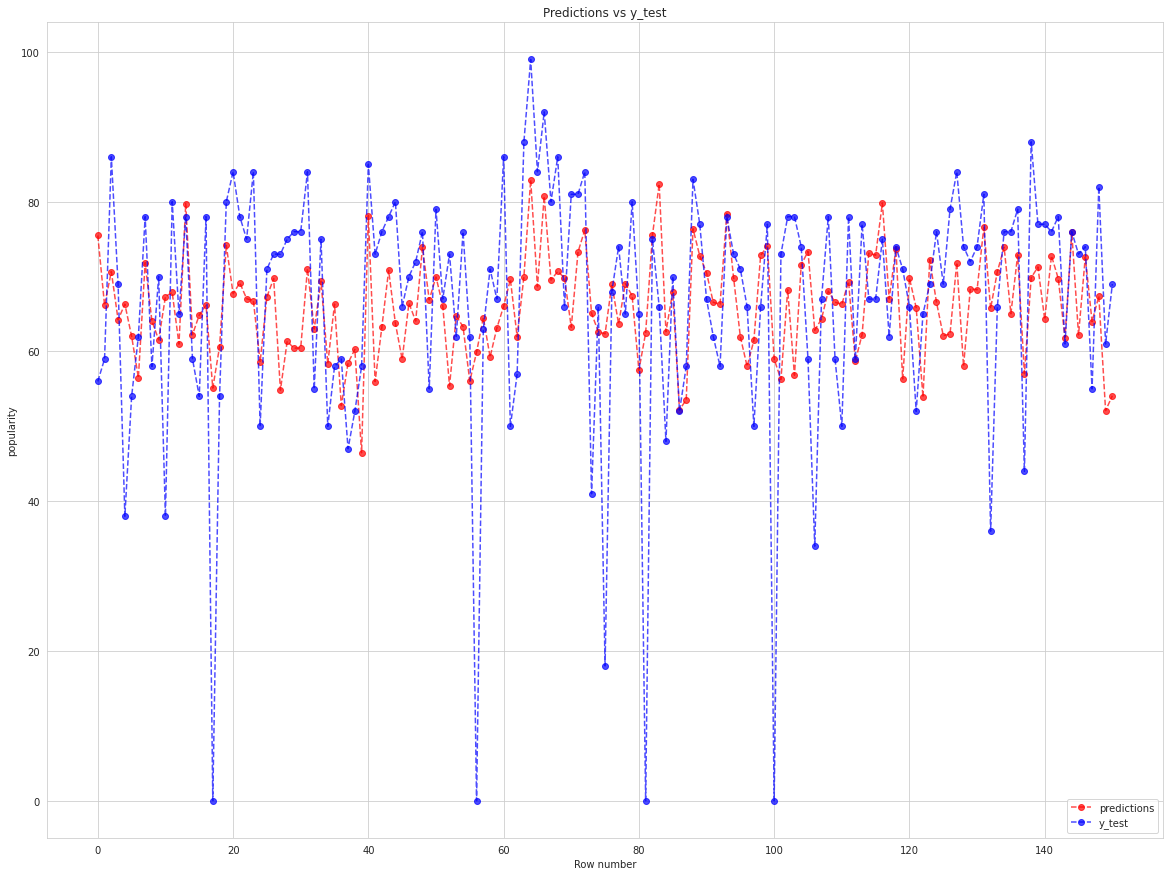

In [ ]:
# visualize the predictions made by our best model and the original targets Y_test
# plot between predictions and Y_test
import numpy as np
x_axis = np.array(range(0, predictions.shape[0]))
figure = plt.figure(figsize=(20,15))
plt.plot(x_axis, search.predict(X_test), linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='b', label="y_test")
plt.xlabel('Row number')
plt.ylabel('popularity')
plt.title('Predictions vs y_test')
plt.legend(loc='lower right')
plt.show()

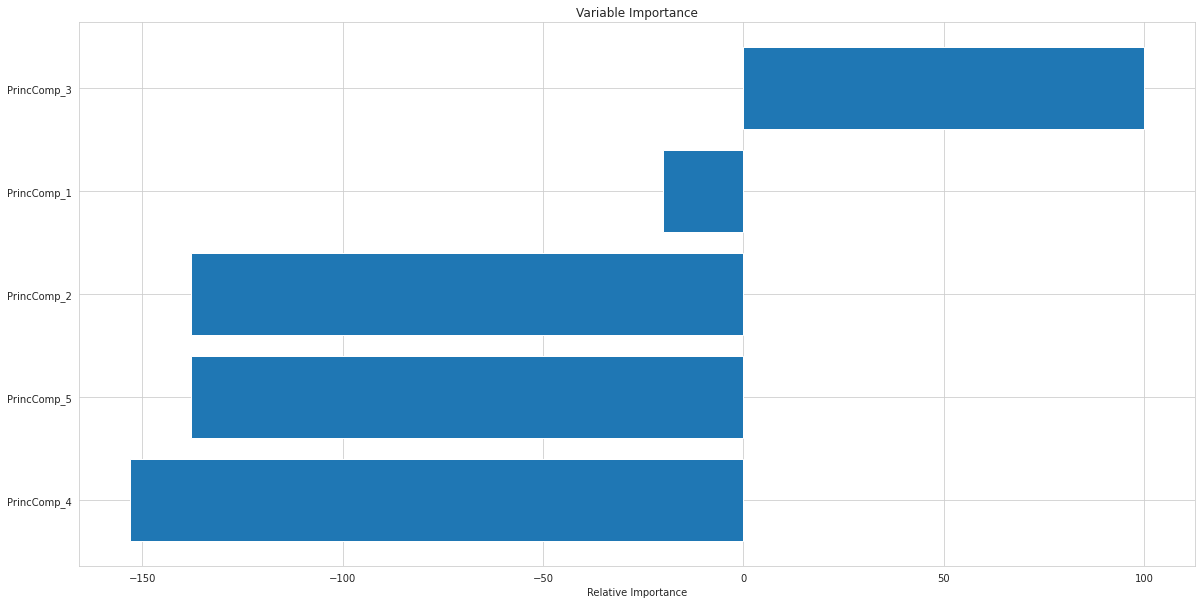

In [ ]:
# plot model's feature importance
feature_importance = best_model.coef_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

sorted_idx = np.argsort(feature_importance)
pos        = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_test.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update({'font.size': 12})
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

In [ ]:
#print type(newY)# pandas core frame
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=3)
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
ridge = Ridge(alpha=0.01) # higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
ridge.fit(X_train, y_train)
ridge1 = Ridge(alpha=100) #  comparison with alpha value
ridge1.fit(X_train, y_train)
train_score=linear.score(X_train, y_train)
test_score=linear.score(X_test, y_test)
Ridge_train_score = ridge.score(X_train,y_train)

In [ ]:
Ridge_test_score = ridge.score(X_test, y_test)
Ridge_train_score1 = ridge1.score(X_train,y_train)
Ridge_test_score1 = ridge1.score(X_test, y_test)
print("linear regression train score:", train_score)
print("linear regression test score:", test_score)
print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)
print("ridge regression train score high alpha:", Ridge_train_score1)
print("ridge regression test score high alpha:", Ridge_test_score1)

linear regression train score: 0.12554982968764272
linear regression test score: 0.15184258322576472
ridge regression train score low alpha: 0.12554982968635964
ridge regression test score low alpha: 0.15184242879529075
ridge regression train score high alpha: 0.12543115719322273
ridge regression test score high alpha: 0.15026899276246608


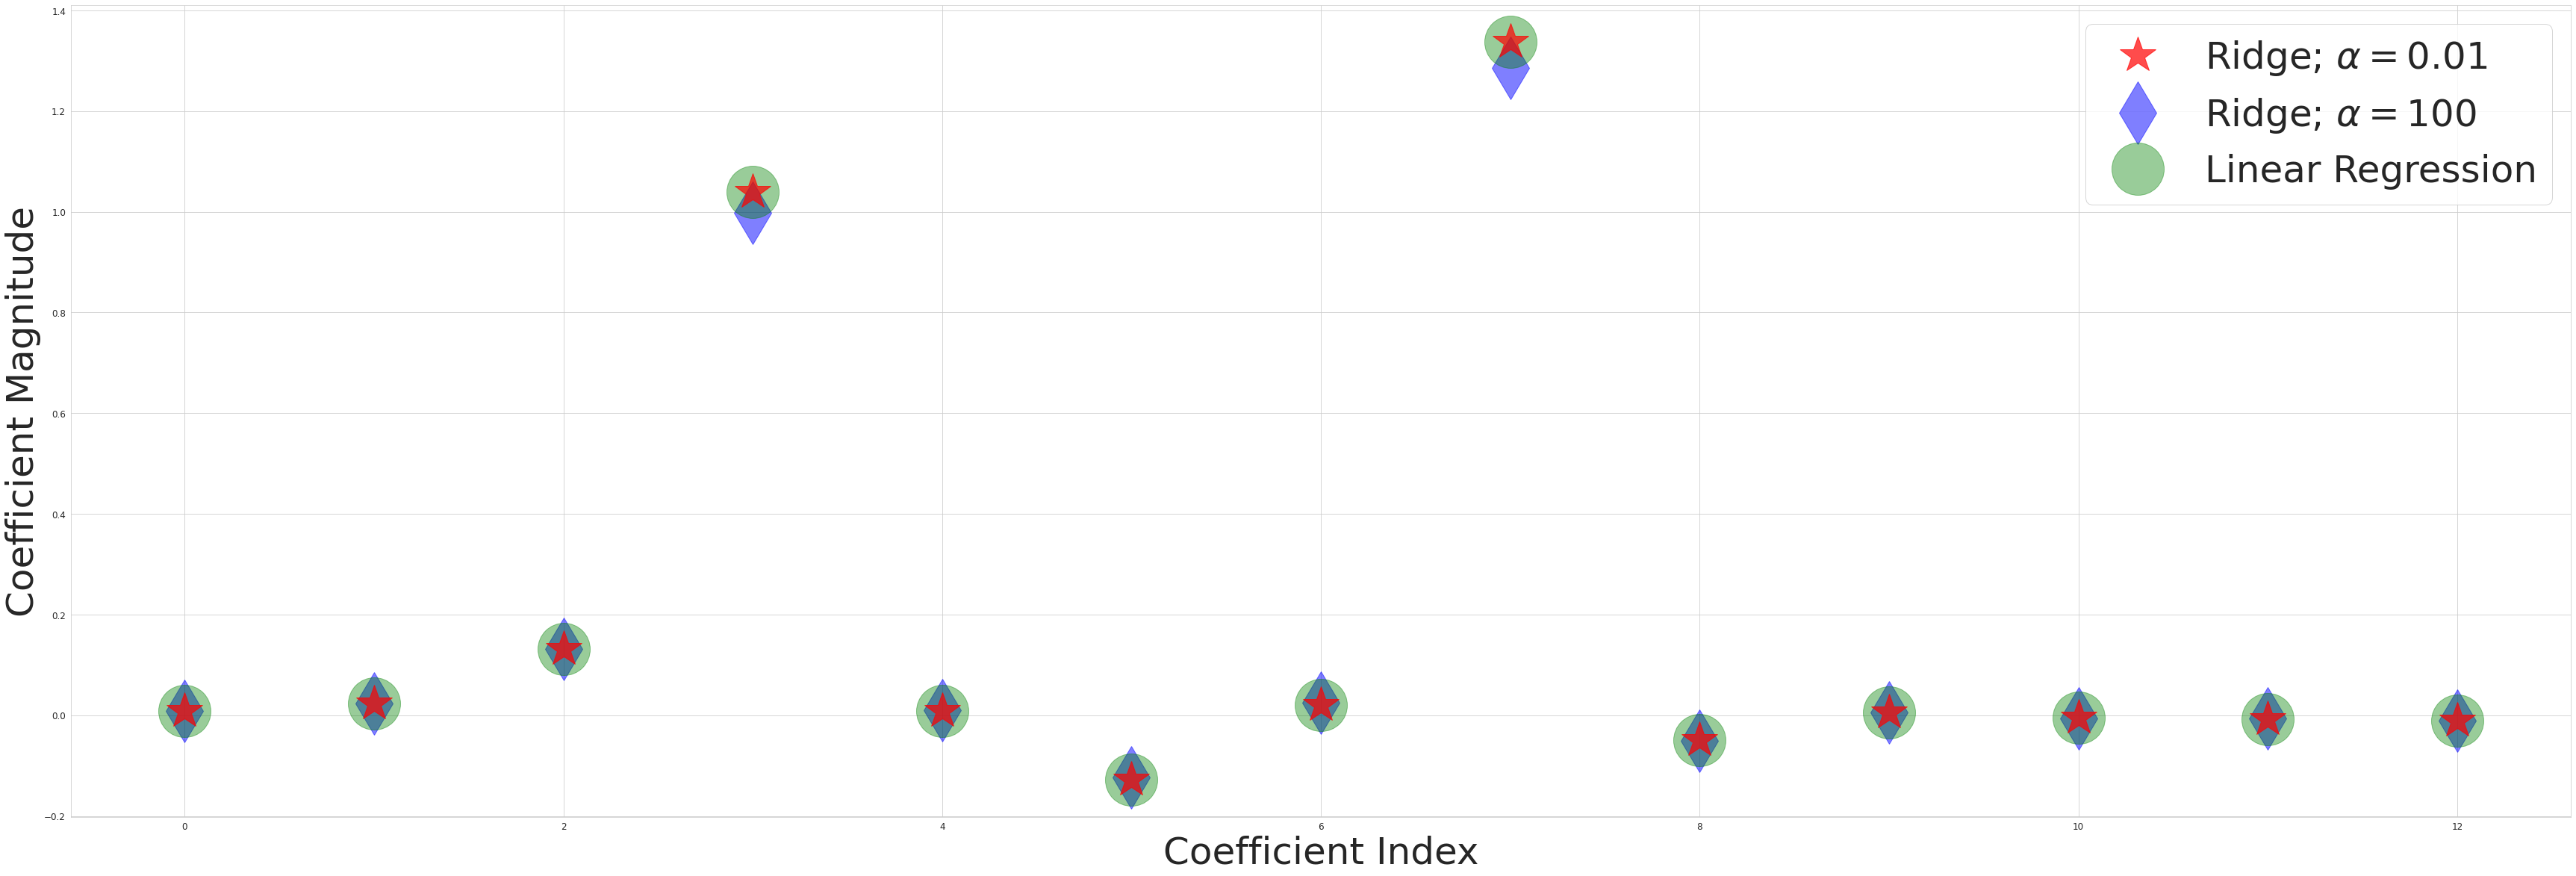

In [ ]:
plt.figure(figsize=(60,20))
plt.plot(ridge.coef_,alpha=0.7,linestyle='none',marker='*',markersize=50,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(ridge1.coef_,alpha=0.5,linestyle='none',marker='d',markersize=60,color='blue',label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(linear.coef_,alpha=0.4,linestyle='none',marker='o',markersize=70,color='green',label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=50)
plt.ylabel('Coefficient Magnitude',fontsize=50)
plt.legend(fontsize=50,loc=1)
plt.show()

# MLP SOLUTION

In [ ]:
spotify.columns

Index(['title_#SELFIE', 'title_#thatPOWER',
       'title_...Ready For It? - BloodPop® Remix', 'title_1+1',
       'title_24K Magic', 'title_2U (feat. Justin Bieber)', 'title_3',
       'title_43776', 'title_7 Years', 'title_A L I E N S',
       ...
       'top genre_house', 'top genre_indie pop',
       'top genre_irish singer-songwriter', 'top genre_latin',
       'top genre_metropopolis', 'top genre_moroccan pop',
       'top genre_neo mellow', 'top genre_permanent wave', 'top genre_pop',
       'top genre_tropical house'],
      dtype='object', length=815)

In [ ]:
 #Seperating our target from our features
 X = data[['title', 'artist', 'top genre', 'year', 'beats_per_min', 'energy',
       'danceability', 'loudness', 'liveness', 'valence', 'duration',
       'acousticness', 'speechiness']].values
 y = data['popularity']
 X.shape
 y.shape

(603,)

In [ ]:
# Split the data
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 20)

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Fitting the scaler
scaler.fit(X_train )

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
# Applying the transformation to the data
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(50,50), solver='sgd', activation='identity')

In [ ]:
# Fitting the model
mlp.fit(X_train,y_train)
# Making predictions
y_pred = mlp.predict(X_test)
#Mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 10.071619016454257


In [ ]:
# Mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# Root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))  

Mean Squared Error: 183.93191231298647
Root Mean Squared Error: 13.562149988589068
